In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression



In [2]:
# Generate a simple dataset
X, y = make_classification(n_samples=100, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           random_state=1, n_clusters_per_class=1)

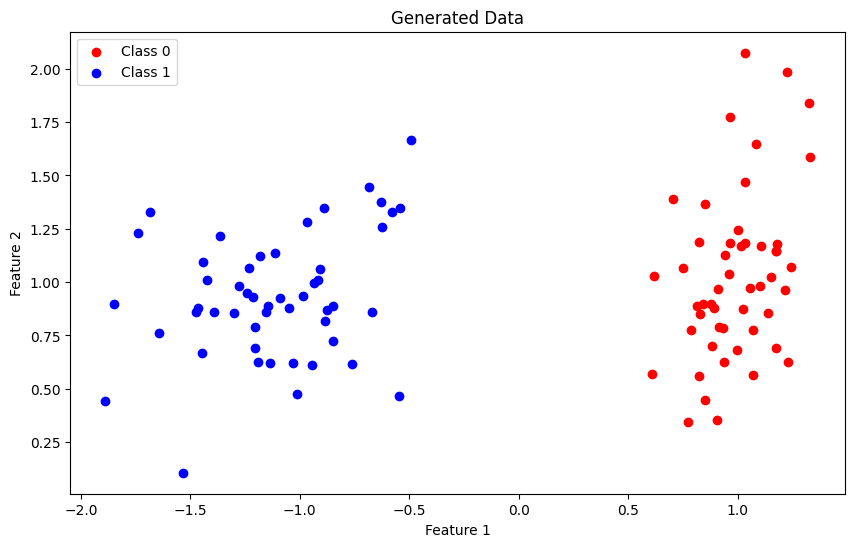

In [3]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data')
plt.show()

In [4]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [5]:
# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[-3.36656909  0.12308678]]
Intercept: [-0.13931403]


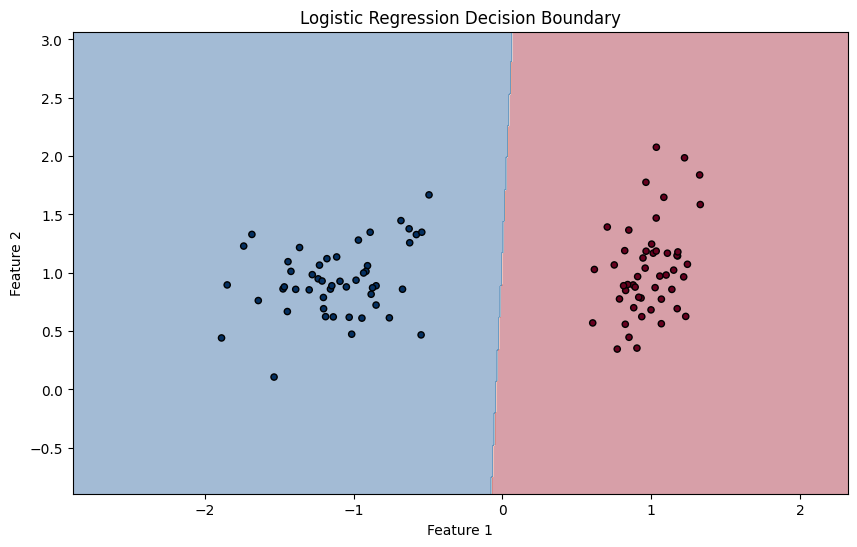

In [6]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', 
                cmap=plt.cm.RdBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X, y)

In [7]:
model.predict(X)

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [8]:
model.predict_proba(X)

array([[0.02925527, 0.97074473],
       [0.95190421, 0.04809579],
       [0.96234307, 0.03765693],
       [0.01849435, 0.98150565],
       [0.04540096, 0.95459904],
       [0.10500532, 0.89499468],
       [0.94044736, 0.05955264],
       [0.01780601, 0.98219399],
       [0.93667864, 0.06332136],
       [0.15077446, 0.84922554],
       [0.98216145, 0.01783855],
       [0.94387459, 0.05612541],
       [0.95408591, 0.04591409],
       [0.9584699 , 0.0415301 ],
       [0.96010192, 0.03989808],
       [0.9600583 , 0.0399417 ],
       [0.0363028 , 0.9636972 ],
       [0.02528084, 0.97471916],
       [0.08816741, 0.91183259],
       [0.07611437, 0.92388563],
       [0.02290729, 0.97709271],
       [0.9881183 , 0.0118817 ],
       [0.00950965, 0.99049035],
       [0.96790295, 0.03209705],
       [0.9822779 , 0.0177221 ],
       [0.01808585, 0.98191415],
       [0.95958613, 0.04041387],
       [0.97028896, 0.02971104],
       [0.97652112, 0.02347888],
       [0.05569736, 0.94430264],
       [0.

In [12]:
import pandas as pd
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(data.loc[:,"Pregnancies":"Age"], data["Outcome"], test_size=0.2)


#### Model training

In [15]:
sc  = StandardScaler()
sc.fit(x_train)

x_train_transform = sc.transform(x_train)
x_test_transform = sc.transform(x_test)

model = LogisticRegression()
model.fit(x_train_transform, y_train)

LogisticRegression()

#### training score


In [16]:
y_pred = model.predict(x_train_transform)

In [17]:
model.score(x_train_transform, y_train)

0.7882736156351792

In [18]:
y_pred_test = model.predict(x_test_transform)

#### testing score

In [19]:
model.score(x_test_transform, y_test)

0.7467532467532467

In [20]:
y_pred_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [21]:
y_test

524    0
26     1
137    0
447    0
655    1
      ..
311    0
332    1
116    1
248    0
9      1
Name: Outcome, Length: 154, dtype: int64